In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./zomato.csv')

In [3]:
df.columns 

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [4]:
df.nunique(axis=0)

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
len(df.name.unique()) # Number of different retaurants that serve on zomato

8792

In [7]:
df.name.head() 

0                    Jalsa
1           Spice Elephant
2          San Churro Cafe
3    Addhuri Udupi Bhojana
4            Grand Village
Name: name, dtype: object

In [8]:
random_restaurant = df.name.unique()[0]
df[df.name == random_restaurant].votes # This is weird

0         775
456       775
559       775
2488      775
2966      775
3462      804
7607     2173
19401     783
20399     783
21302     783
41364    2189
Name: votes, dtype: int64

In [9]:
df.online_order.value_counts() 

Yes    30444
No     21273
Name: online_order, dtype: int64

In [10]:
df.book_table.value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

In [11]:
print(df.rate.unique()) # all the ratings are out of 5
# lets make a modified data frame
df['rates_clean'] = df['rate']
df['rates_clean'] = df['rate'].str.split('/', expand=True)
df['rates_clean'][df.rates_clean == "NEW"] = None
df['rates_clean'][df.rates_clean == "-"] = None
df['rates_clean'] = df.rates_clean.astype('float')
df['rates_clean'].fillna(round(df.rates_clean.mean(), 1), inplace=True) # Fill with mean
# df['rates_clean'].isn
print(sorted(df.rates_clean.unique()))

['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']
[1.8, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]


/var/folders/lz/dq65w21x2txghppz6q59j3ym0000gn/T/ipykernel_1058/442359960.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rates_clean'][df.rates_clean == "NEW"] = None
/var/folders/lz/dq65w21x2txghppz6q59j3ym0000gn/T/ipykernel_1058/442359960.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rates_clean'][df.rates_clean == "-"] = None


In [12]:
df.votes.describe() # How many customers have reviewed the restuarant


count    51717.000000
mean       283.697527
std        803.838853
min          0.000000
25%          7.000000
50%         41.000000
75%        198.000000
max      16832.000000
Name: votes, dtype: float64

[[1.         0.42744287]
 [0.42744287 1.        ]]


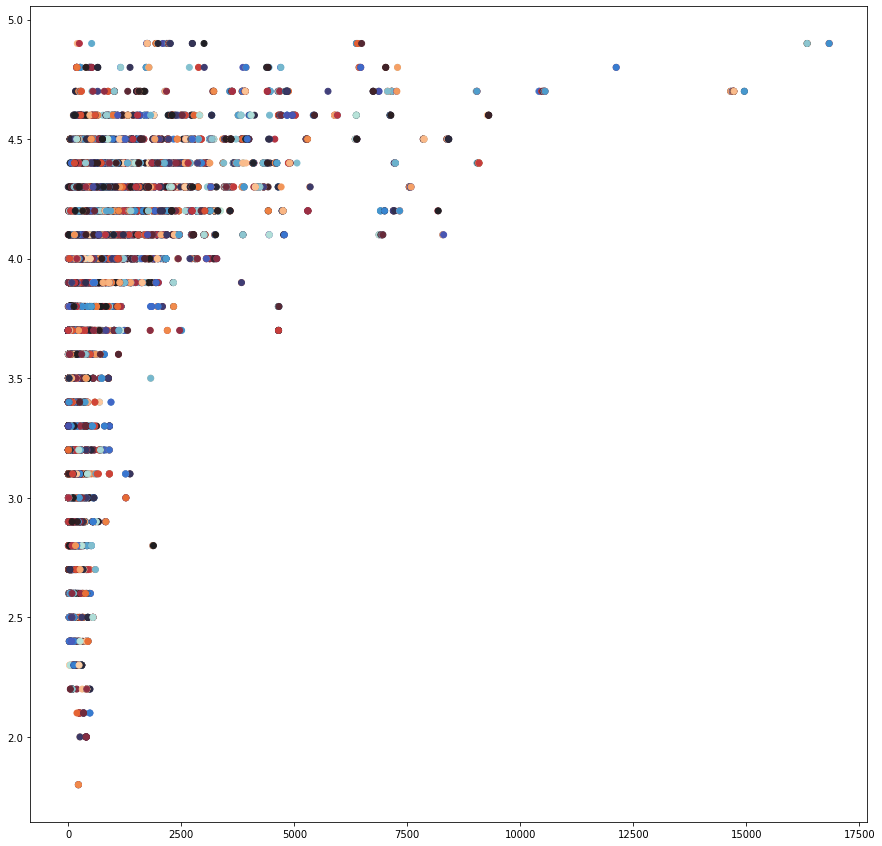

<Figure size 1080x1080 with 0 Axes>

In [13]:
print(np.corrcoef(df.votes, df.rates_clean)) 
# So like how good a restaurant is independent of how many people reviewed it
colors = np.random.randint(low = 0, high=255, size=df.shape[0])
plt.figure(figsize=(15, 15))
# plt.colorbar()
plt.scatter(df.votes, df.rates_clean, c=colors, cmap='icefire')
plt.figure(figsize=(15, 15))
# plt.colorbar()
plt.show()

In [14]:
df.phone # Just phone numbers

0          080 42297555\r\n+91 9743772233
1                            080 41714161
2                          +91 9663487993
3                          +91 9620009302
4        +91 8026612447\r\n+91 9901210005
                       ...               
51712                        080 40301477
51713                      +91 8197675843
51714                                 NaN
51715                        080 49652769
51716                      +91 8071117272
Name: phone, Length: 51717, dtype: object

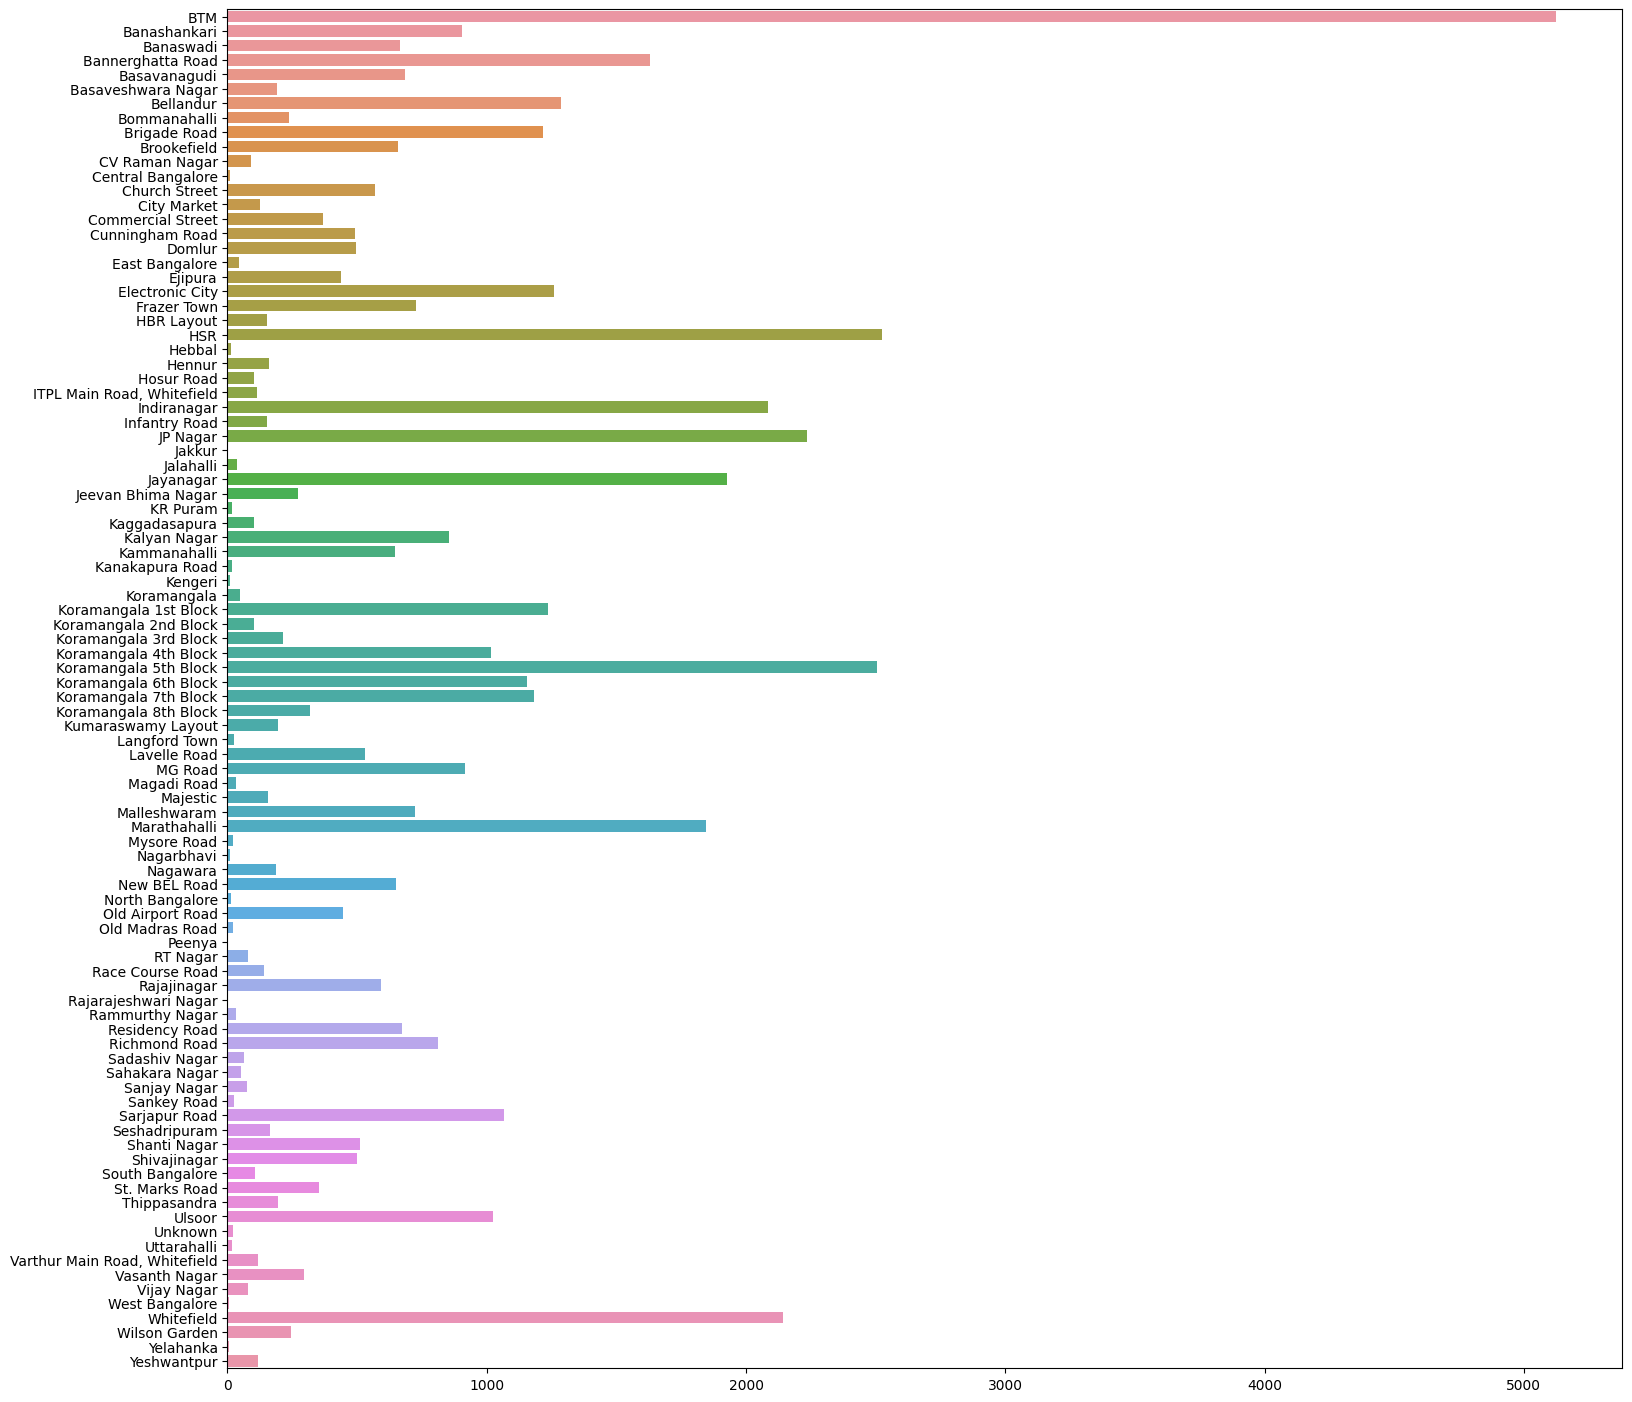

In [15]:
df.location.isna().any()
df.location.fillna('Unknown', inplace=True)
labels, data = np.unique(df.location, return_counts=True)
plt.figure(figsize=(18,18), dpi=100)
sns.barplot(x=data, y=labels)
plt.show() 
# BTM has the highest number of orders placed

In [16]:
# np.unique(df.rest_type)
sum(df.rest_type.isna()) # Theres 227 nans
df['rest_type'].fillna('NotAvailable', inplace=True)
np.unique(df.rest_type.str.split(', ',expand=True).fillna('NotAvailable'), return_counts=True) # Various kinds of food joints

(array(['Bakery', 'Bar', 'Beverage Shop', 'Bhojanalya', 'Cafe',
        'Casual Dining', 'Club', 'Confectionery', 'Delivery',
        'Dessert Parlor', 'Dhaba', 'Fine Dining', 'Food Court',
        'Food Truck', 'Irani Cafee', 'Kiosk', 'Lounge', 'Meat Shop',
        'Mess', 'Microbrewery', 'NotAvailable', 'Pop Up', 'Pub',
        'Quick Bites', 'Sweet Shop', 'Takeaway'], dtype=object),
 array([ 1998,  2457,  1471,     3,  5074, 13057,    41,    47,  4641,
         3211,    40,   405,   765,    84,    15,   192,   555,     4,
          274,   390, 44217,     2,   950, 20639,   745,  2157]))

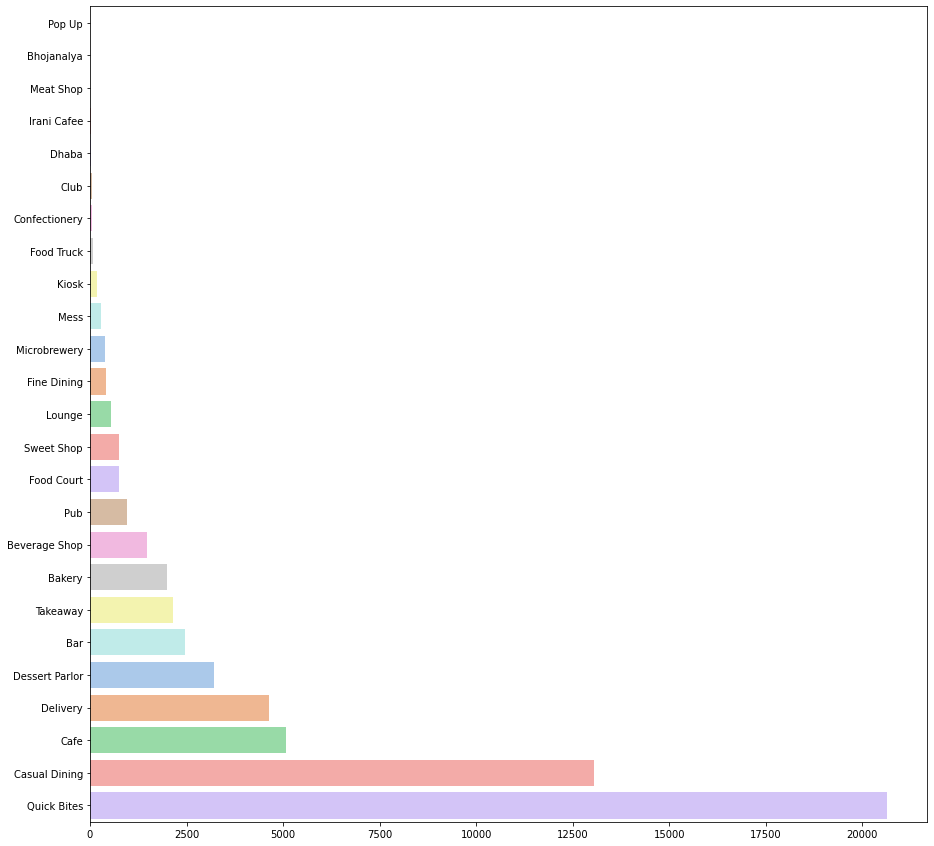

In [17]:
labels, data = np.unique(df.rest_type.str.split(', ',expand=True).fillna('NotAvailable'), return_counts=True)
mask = ~(labels == 'NotAvailable')
labels_fil, data_fil = labels[mask], data[mask]
sort = np.argsort(data_fil)
labels_fil = labels_fil[sort]
data_fil = data_fil[sort]
plt.figure(figsize=(15, 15))
sns.barplot(x=data_fil, y=labels_fil, palette='pastel')
plt.show()
# The orders are placed for quick bites and snacks the most

In [18]:
df.dish_liked.isna().sum() # Almost half of the orders had unliked dishes
# This maybe more just cos they forgot to like them
len(np.unique(df.dish_liked.str.split(', ',expand=True).fillna('NotAvailable'), return_counts=True)[0])

2793

In [19]:
text = df.cuisines.str.cat(sep=', ')
text

'North Indian, Mughlai, Chinese, Chinese, North Indian, Thai, Cafe, Mexican, Italian, South Indian, North Indian, North Indian, Rajasthani, North Indian, North Indian, South Indian, Andhra, Chinese, Pizza, Cafe, Italian, Cafe, Italian, Continental, Cafe, Mexican, Italian, Momos, Beverages, Cafe, Cafe, Italian, Continental, Cafe, Chinese, Continental, Italian, Cafe, Continental, Cafe, Mexican, Italian, Cafe, Cafe, Fast Food, Continental, Chinese, Momos, Chinese, Cafe, Italian, Cafe, Italian, American, Cafe, Chinese, Continental, Italian, Cafe, French, North Indian, Cafe, Pizza, Fast Food, Beverages, Cafe, Fast Food, Italian, Fast Food, Cafe, European, Cafe, Cafe, Bakery, Cafe, South Indian, Cafe, Fast Food, Beverages, Cafe, Fast Food, North Indian, Cafe, Chinese, Fast Food, Cafe, Italian, North Indian, Fast Food, Chinese, Burger, Bakery, Desserts, Pizza, North Indian, Biryani, Fast Food, Biryani, North Indian, Chinese, Fast Food, Chinese, Thai, Momos, North Indian, Mughlai, South Indian

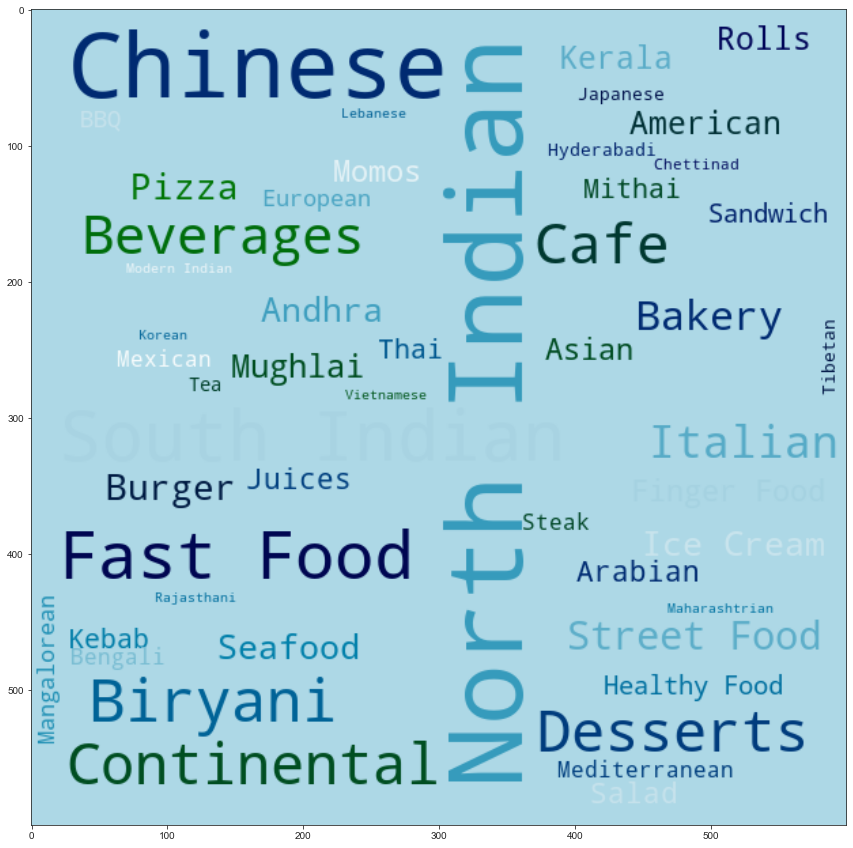

In [34]:
cuisines, freq = np.unique(df.cuisines.str.split(', ', expand=True).fillna('NA'), return_counts=True)
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

dic = {}
for word in text.split(', '):
    if word not in dic:
        dic[word] = 0
    dic[word] += 1
    
wordcloud = WordCloud(width=600, height=600, margin=0, background_color="lightblue", colormap=plt.cm.get_cmap('ocean'), max_words=50).generate_from_frequencies(dic)

# Display the generated image:
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [21]:
df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mode()[0], inplace=True)

In [22]:
df['approx_cost(for two people)'].isna().any()

False

In [23]:
df['approx_cost(for two people)'].str.replace(',','').astype('int')

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 51717, dtype: int64

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

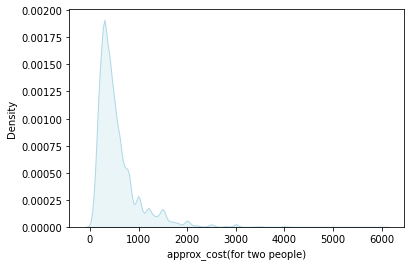

In [24]:
sns.kdeplot(df['approx_cost(for two people)'].str.replace(',','').astype('int'), color='lightblue', fill=True)
# orders follow an almost gaussian distribution, cool

In [25]:
df.menu_item.unique() # Im assuming restiarants use different names for the sam dishes

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

In [26]:
df.reviews_list #tf ?

0        [('Rated 4.0', 'RATED\n  A beautiful place to ...
1        [('Rated 4.0', 'RATED\n  Had been here for din...
2        [('Rated 3.0', "RATED\n  Ambience is not that ...
3        [('Rated 4.0', "RATED\n  Great food and proper...
4        [('Rated 4.0', 'RATED\n  Very good restaurant ...
                               ...                        
51712    [('Rated 5.0', "RATED\n  Food and service are ...
51713                                                   []
51714                                                   []
51715    [('Rated 4.0', 'RATED\n  Nice and friendly pla...
51716    [('Rated 5.0', 'RATED\n  Great ambience , look...
Name: reviews_list, Length: 51717, dtype: object

In [27]:
sum(df['listed_in(city)'] == df['location']) # Many orders are far away orders

16020

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

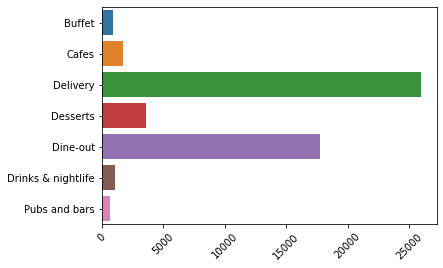

In [28]:
labels, counts = np.unique(df['listed_in(type)'], return_counts=True) # Zomato's Assigned Type of restaurant
sns.barplot(x=counts, y=labels)
plt.xticks(rotation=45)

In [36]:
df.corr()
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates_clean
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,3.6
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield,3.7
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield,3.7
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,4.3
